## Author : Milan Kandwal

## GRIP @ The Sparks Foundation

## TASK 1: Prediction using Supervised ML

    In this Task we will predict the Score that students are expected to score based upon the number of hours they studied.
    Data can be found at http://bit.ly/w-data.

What will be predicted score if a student study for 9.25 hrs in a day?

### Step 1 - Importing Libraries

In [1]:
# Importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2 - Reading the data from source

In [2]:
# Reading data from remote link
data_set=pd.read_csv("http://bit.ly/w-data")
print("Data import successful")

data_set.head(5)

Data import successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#checking for null values
data_set.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values and hence data cleaning is not required

**Let's plot this data in graph to see what kind of relationship we get between the two parameters- Hours and Scores.**

### Step 3 - Input data Visualization

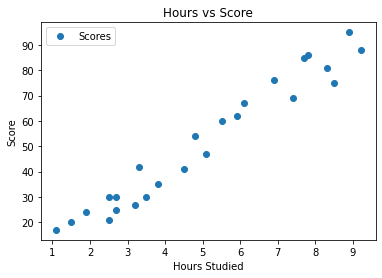

In [4]:
# Plotting the distribution of scores
data_set.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

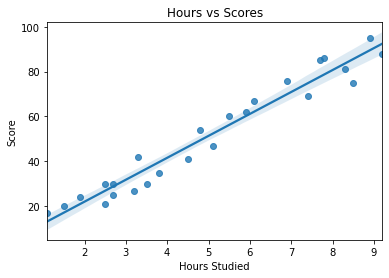

In [5]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=data_set['Hours'],y=data_set['Scores'],data=data_set)
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and score.

### Step 4 - Data Preparing

In [6]:
A = data_set.iloc[:, :-1].values  
B = data_set.iloc[:, 1].values

### Step 5 - Model Training

Splitting the data into training and testing sets, and training the algorithm.

In [7]:
# Using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=0) 

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(A_train.reshape(-1,1), B_train) 
print("Training complete.")

Training complete.


### Step 6 - Plotting the Line of regression

Now since our model is trained now, its the time to visualize the best-fit line of regression.

In [9]:
# Plotting the regression line
line = regressor.coef_*A+regressor.intercept_

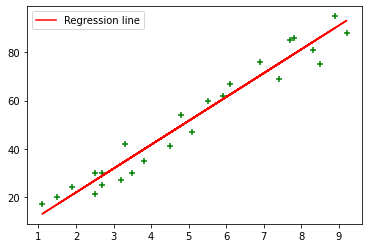

In [10]:
# Plotting for the test data
plt.scatter(A, B, color='green', marker='+')
plt.plot(A, line,color='red', label='Regression line')
plt.legend()
plt.show()

### Step 7 - Making Predictions

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [11]:
# Testing data
print(A_test)
# Model Prediction 
B_pred = regressor.predict(A_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Step 8 - Comparing Actual result to the Predicted Model result

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': B_test, 'Predicted': B_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
#Estimating training and test score
print("Training Score:",regressor.score(A_train,B_train))
print("Test Score:",regressor.score(A_test,B_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


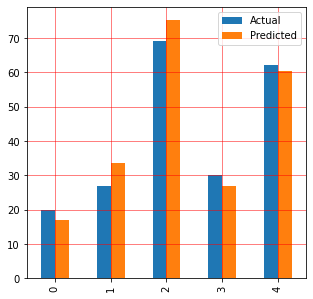

In [14]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

**Predicting Score for 9.25 hr study**

In [15]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Step 9 - Evaluating the model

The final step is to evaluate the performance of algorithm.This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(B_test, B_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(B_test, B_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(B_test, B_pred)))
print('R-2:', metrics.r2_score(B_test, B_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


R-squared gives the goodness of the fit and as can be seen it is 94.54% which is really good. This means that the algorithm has proven to be good for the given data.

It can also be said that the model's accuracy is 94.54%

**Conclusion**

**I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.**

**Thank You**